# EX1:

In [35]:
import pandas as pd
df = pd.read_csv('dataset.csv')
df

,Lương,Thời gian làm việc,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,9,0.50,1
6,4,3.00,1
7,5,2.50,1
8,8,1.00,1
9,4,2.50,1


In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data = df.values
data.shape

(20, 3)

In [5]:
N, d = data.shape
x = data[:, :d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

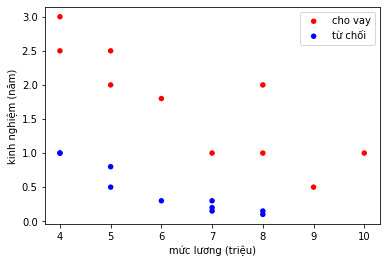

In [6]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
plt.show()

In [32]:
X = np.hstack((np.ones((N, 1)), x))
X

array([[ 1.  , 10.  ,  1.  ],
       [ 1.  ,  5.  ,  2.  ],
       [ 1.  ,  6.  ,  1.8 ],
       [ 1.  ,  7.  ,  1.  ],
       [ 1.  ,  8.  ,  2.  ],
       [ 1.  ,  9.  ,  0.5 ],
       [ 1.  ,  4.  ,  3.  ],
       [ 1.  ,  5.  ,  2.5 ],
       [ 1.  ,  8.  ,  1.  ],
       [ 1.  ,  4.  ,  2.5 ],
       [ 1.  ,  8.  ,  0.1 ],
       [ 1.  ,  7.  ,  0.15],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.8 ],
       [ 1.  ,  7.  ,  0.3 ],
       [ 1.  ,  4.  ,  1.  ],
       [ 1.  ,  5.  ,  0.5 ],
       [ 1.  ,  6.  ,  0.3 ],
       [ 1.  ,  7.  ,  0.2 ],
       [ 1.  ,  8.  ,  0.15]])

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [34]:
def train(X, y, learning_rate, iteration, W):
    if W is None:
        W = np.random.rand(X.shape[0], 1)
    for i in range(1, iteration):
        y_pre = sigmoid(X @ W)
        loss = -np.sum(y*np.log(y_pre) + (1-y)*np.log(1-y_pre))
        delta = X.T @ (y_pre - y)
        W = W - learning_rate*delta
        if i%1000 == 0:
            print(i, ':', loss)
    return W

In [15]:
W = train(X, y, 0.01, 1000000)

1000 : 3.1698551175701604
2000 : 1.9034446075131395
3000 : 1.3822698360849475
4000 : 1.092796830766596
5000 : 0.9068936644256637
6000 : 0.7767275332777911
7000 : 0.6801863955812509
8000 : 0.6055717649024311
9000 : 0.546087234015103
10000 : 0.4975023508657016
11000 : 0.457040371008484
12000 : 0.42280028972156714
13000 : 0.39343522927671143
14000 : 0.3679633348686456
15000 : 0.3456514199522648
16000 : 0.3259405956543731
17000 : 0.3083971692998173
18000 : 0.2926793077423352
19000 : 0.2785138461656358
20000 : 0.2656798055904455
21000 : 0.25399645391231007
22000 : 0.24331451018478856
23000 : 0.23350956516350144
24000 : 0.22447709148192188
25000 : 0.21612861180330312
26000 : 0.20838872247538512
27000 : 0.20119275741085738
28000 : 0.19448493677872414
29000 : 0.18821688683101054
30000 : 0.18234644671050027
31000 : 0.17683669924155196
32000 : 0.17165517805359595
33000 : 0.16677321464721417
34000 : 0.16216539736173907
35000 : 0.15780912045486845
36000 : 0.1536842062290889
37000 : 0.1497725867407

In [16]:
W

array([[-50.38107428],
       [  5.06748291],
       [ 22.03930247]])

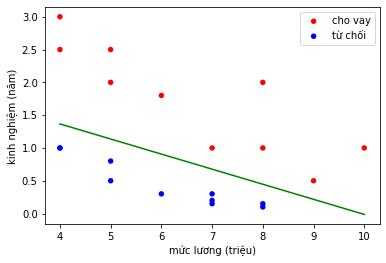

In [17]:
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')
t = 0.5
plt.plot((4, 10),(-(W[0]+4*W[1]+ np.log(1/t-1))/W[2], -(W[0] + 10*W[1]+ np.log(1/t-1))/W[2]), 'g')
plt.show()

In [30]:
test = np.array([1, 6, 1])
predict = sigmoid(test@W)
predict[0]

0.8872671865416285

p>0.5 -> cho vay

# EX2: